In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    Dropout(0.2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2),padding='same'),

    Conv2D(64, (3,3), activation='relu'),
    Dropout(0.2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2),padding='same'),

    Conv2D(128, (3,3), activation='relu'),
    Dropout(0.2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2),padding='same'),

    Flatten(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64)
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 208s 259ms/step - accuracy: 0.2637 - loss: 1.9425 - val_accuracy: 0.4888 - val_loss: 1.3828
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 193s 247ms/step - accuracy: 0.4977 - loss: 1.3778 - val_accuracy: 0.5666 - val_loss: 1.2004
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 250ms/step - accuracy: 0.5773 - loss: 1.1831 - val_accuracy: 0.6133 - val_loss: 1.0984
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 249ms/step - accuracy: 0.6209 - loss: 1.0740 - val_accuracy: 0.6444 - val_loss: 1.0313
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 206s 254ms/step - accuracy: 0.6550 - loss: 0.9825 - val_accuracy: 0.6578 - val_loss: 0.9984
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 253ms/step - accuracy: 0.6792 - loss: 0.9183 - val_accuracy: 0.6941 - val_loss: 0.8876
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 195s 249ms/step - accuracy: 0.6996 - loss: 0.8584 - val_accuracy: 0.7014 - val_loss: 0.8606
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 249ms/step - accuracy: 0.7156 -

In [3]:
# Get first 4 test images
num_images = 4
predictions = model.predict(x_test[:num_images])
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test[:num_images], axis=1)

# Print predictions vs actual labels
print("Predictions vs Actual Labels:")
for i in range(num_images):
    print(f"Image {i+1}: Predicted={predicted_labels[i]}, Actual={actual_labels[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Predictions vs Actual Labels:
Image 1: Predicted=3, Actual=3
Image 2: Predicted=8, Actual=8
Image 3: Predicted=8, Actual=8
Image 4: Predicted=0, Actual=0


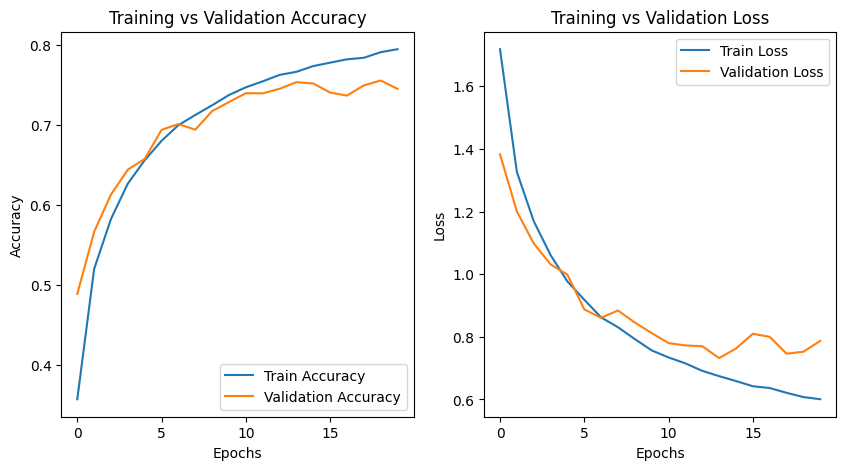

In [4]:
# Plot Accuracy & Loss Graphs
plt.figure(figsize=(10, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

https://drive.google.com/file/d/1DfcmcgDHQCQ5pE0GuYtWrHNnr1bYtPaJ/view?usp=drive_link